#  __AtliQ Hardware Product Analysis__

## Introduction

### Research Objective

The aim of this study is to analyze product sales, identify bestsellers, assess sales trends of different markets, and recommend strategies to improve sales. This analysis should help the company optimize product offerings and enhance its sales.

__Key questions addressed:__ 

1. Which products are the bestsellers in terms of revenue and quantity sold?
2. How has product popularity changed over time?
3. How do sales differ across regions and customer platforms?
4. Are there any low selling products that need to be improved or discontinued?
5. How do discounts and pricing affect product sales?
6. What product categories contribute the most to total sales?

__Data source:__
An SQLite database atliq_db.sqlite3 containing information about
- customers
- products
- pricing
- sales
- discounts
- manufacturing costs

## Loading libraries and connection to the database

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
### connect to the database
import sqlite3
con = sqlite3.connect('atliq_db.sqlite3')

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


In [3]:
### execute simple query in Python with your connection
query="""Select * from 
dim_customer
"""
dim_customer=pd.read_sql_query(query, con)
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


## Check for missing and duplicates

In [4]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [5]:
dim_customer.duplicated().sum()

np.int64(0)

In [6]:
dim_product = pd.read_sql_query('SELECT * FROM dim_product', con)
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [7]:
dim_product

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
...,...,...,...,...,...,...
392,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
393,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
394,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
395,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus


In [8]:
fact_pre_discount = pd.read_sql_query('SELECT * FROM fact_pre_discount', con)
fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [9]:
fact_pre_discount

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


In [10]:
fact_pre_discount.duplicated().sum()

np.int64(0)

In [11]:
fact_manufacturing_cost = pd.read_sql_query('SELECT * FROM fact_manufacturing_cost', con)
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [12]:
fact_manufacturing_cost

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
...,...,...,...
1177,A7321160301,2022,13.4069
1178,A7321160302,2021,12.5670
1179,A7321160302,2022,13.1954
1180,A7321160303,2021,12.9502


In [13]:
fact_manufacturing_cost.duplicated().sum()

np.int64(0)

In [14]:
fact_gross_price = pd.read_sql_query('SELECT * FROM fact_gross_price', con)
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [15]:
fact_gross_price

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
...,...,...,...
1177,A7321160301,2022,44.6260
1178,A7321160302,2021,43.9446
1179,A7321160302,2022,46.0399
1180,A7321160303,2021,42.8483


In [16]:
fact_gross_price.duplicated().sum()

np.int64(0)

In [17]:
fact_sales_monthly = pd.read_sql_query('SELECT * FROM fact_sales_monthly', con)
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [18]:
fact_sales_monthly

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
...,...,...,...,...,...
67246,2019-06-01,A0418150104,90013124.0,16.0,2019.0
67247,2019-06-01,A0418150104,90014136.0,2.0,2019.0
67248,2019-06-01,A0418150104,90014137.0,1.0,2019.0
67249,2019-06-01,A0418150104,90014140.0,3.0,2019.0


One record contains NaN values. Let's remove it since it is only one row

In [19]:
fact_sales_monthly = fact_sales_monthly.dropna()
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67250 non-null  object 
 1   product_code   67250 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.1+ MB


In [20]:
fact_sales_monthly.duplicated().sum()

np.int64(0)

missing values - fixed

no duplicates

## Research

### Which products are the bestsellers in terms of revenue and quantity sold?

#### Products rate by sales quantity

In [21]:
bestsellers_by_sales = pd.read_sql_query('''
    SELECT dim_product.product, SUM(fact_sales_monthly.sold_quantity) AS total_sales
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    GROUP BY dim_product.product
    ORDER BY total_sales DESC''',
    con
)
bestsellers_by_sales.style.format({'total_sales': '{:,}'})

,product,total_sales
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,"1,211,581"
1,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,"1,075,354"
2,AQ Zion Saga,"843,464"
3,AQ Mforce Gen X,"652,536"


Let's check why there are only 4 products shown in the result

In [22]:
# print all rows including total-sales==0
total_sales = pd.read_sql_query('''
    SELECT dim_product.product, dim_product.product_code,
           COALESCE(SUM(fact_sales_monthly.sold_quantity), 0) AS total_sales
    FROM dim_product
    LEFT JOIN fact_sales_monthly 
    ON dim_product.product_code = fact_sales_monthly.product_code
    GROUP BY dim_product.product
    ORDER BY total_sales DESC;''', con)
total_sales.head(10).style.format({'total_sales': '{:,}'})

,product,product_code,total_sales
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,A0118150101,"1,211,581"
1,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,A0219150201,"1,075,354"
2,AQ Zion Saga,A0320150301,"843,464"
3,AQ Mforce Gen X,A0418150101,"652,536"
4,AQ Wi Power Dx3,A7321160301,0
5,AQ Wi Power Dx2,A7219160201,0
6,AQ Wi Power Dx1,A7118160101,0
7,AQ Velocity,A4318110301,0
8,AQ Ultra Dual 3.0,A7018160402,0
9,AQ Ultra Dual 2.0,A6918160303,0


In [23]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       73 non-null     object
 1   product_code  73 non-null     object
 2   total_sales   73 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


total_sales table contains 73 records

In [24]:
# print only rows total_sales==0
total_sales_0 = total_sales.loc[total_sales['total_sales']==0]
total_sales_0

,product,product_code,total_sales
4,AQ Wi Power Dx3,A7321160301,0
5,AQ Wi Power Dx2,A7219160201,0
6,AQ Wi Power Dx1,A7118160101,0
7,AQ Velocity,A4318110301,0
8,AQ Ultra Dual 3.0,A7018160402,0
...,...,...,...
68,AQ BZ 101,A4918110101,0
69,AQ Aspiron,A4118110101,0
70,AQ 5000 Series Ultron 8 5900X Desktop Processor,A1219150301,0
71,AQ 5000 Series Electron 9 5900X Desktop Processor,A1018150101,0


69 records are total_sales==0

let's check how many products with total_sales==0 exist in fact_sales_monthly table

In [25]:
total_sales_0['is_in_fact_sales_monthly'] = total_sales_0['total_sales'].isin(fact_sales_monthly['product_code'])
total_sales_0

C:\Users\pdudo\AppData\Local\Temp\ipykernel_41436\1891600700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sales_0['is_in_fact_sales_monthly'] = total_sales_0['total_sales'].isin(fact_sales_monthly['product_code'])


,product,product_code,total_sales,is_in_fact_sales_monthly
4,AQ Wi Power Dx3,A7321160301,0,False
5,AQ Wi Power Dx2,A7219160201,0,False
6,AQ Wi Power Dx1,A7118160101,0,False
7,AQ Velocity,A4318110301,0,False
8,AQ Ultra Dual 3.0,A7018160402,0,False
...,...,...,...,...
68,AQ BZ 101,A4918110101,0,False
69,AQ Aspiron,A4118110101,0,False
70,AQ 5000 Series Ultron 8 5900X Desktop Processor,A1219150301,0,False
71,AQ 5000 Series Electron 9 5900X Desktop Processor,A1018150101,0,False


In [26]:
total_sales_0['is_in_fact_sales_monthly'].value_counts()

is_in_fact_sales_monthly
False    69
Name: count, dtype: int64

out of 73 unique products in total_sales 69 do not exist fact_sales_monthly, thus we have data only about 4 products

In [27]:
fact_sales_monthly['product_code'].nunique()

14

fact_sales_monthly reports about 14 unique product codes only 

Let's find the product names that corespond to these product codes

In [28]:
product_sales_summary = pd.read_sql_query('''
    SELECT dim_product.product, 
           fact_sales_monthly.product_code,
           SUM(fact_sales_monthly.sold_quantity) AS total_quantity_sold
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    GROUP BY dim_product.product, fact_sales_monthly.product_code
    ORDER BY total_quantity_sold DESC;
''', con)

product_sales_summary.style.format({'total_quantity_sold': '{:,}'})

,product,product_code,total_quantity_sold
0,AQ Mforce Gen X,A0418150103,"399,751"
1,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,A0118150104,"386,569"
2,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,A0118150103,"380,146"
3,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,A0219150201,"378,195"
4,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,A0219150202,"370,148"
5,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,A0220150203,"327,011"
6,AQ Zion Saga,A0320150301,"319,568"
7,AQ Zion Saga,A0321150302,"268,082"
8,AQ Zion Saga,A0321150303,"255,814"
9,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,A0118150101,"222,942"


In [29]:
product_sales_summary['product'].unique()

array(['AQ Mforce Gen X',
       'AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache',
       'AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm',
       'AQ Zion Saga'], dtype=object)

14 unique codes from fact_sales_monthly correspond to 4 product names from dim_product

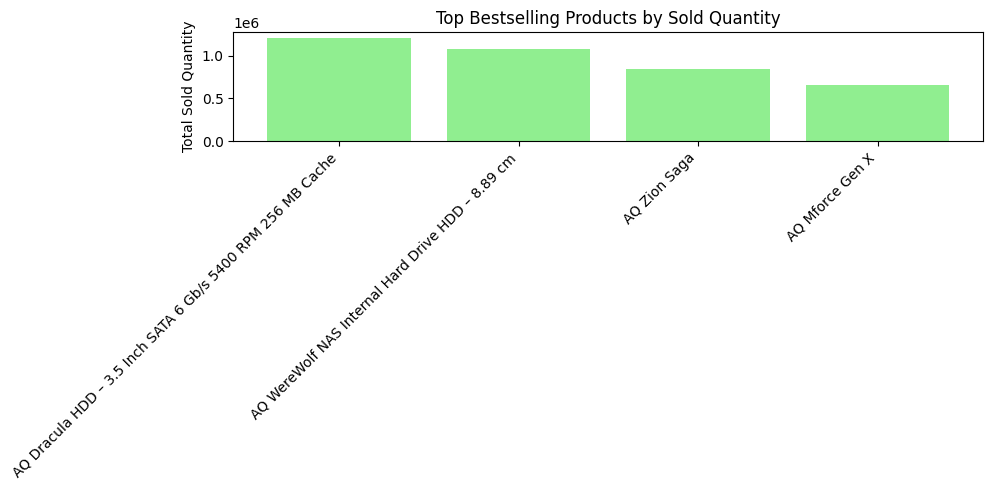

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(bestsellers_by_sales['product'], bestsellers_by_sales['total_sales'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top Bestselling Products by Sold Quantity')
plt.ylabel('Total Sold Quantity')
plt.tight_layout()
plt.show()

##### Conclusion: 
- we have sales data about 4 products
- #1 is "AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache"

#### Products rate by revenue

In [31]:
bestsellers_by_revenue = pd.read_sql_query('''
    SELECT dim_product.product, 
           SUM(fact_sales_monthly.sold_quantity * fact_gross_price.gross_price) AS total_revenue
    FROM fact_sales_monthly
    JOIN dim_product ON fact_sales_monthly.product_code = dim_product.product_code
    JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code
    AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    GROUP BY dim_product.product
    ORDER BY total_revenue DESC;
''', con)

bestsellers_by_revenue.round(2).style.format({'total_revenue': '{:,}'})

,product,total_revenue
0,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,"26,003,959.68"
1,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,"25,433,048.27"
2,AQ Zion Saga,"23,019,325.8"
3,AQ Mforce Gen X,"12,099,575.31"


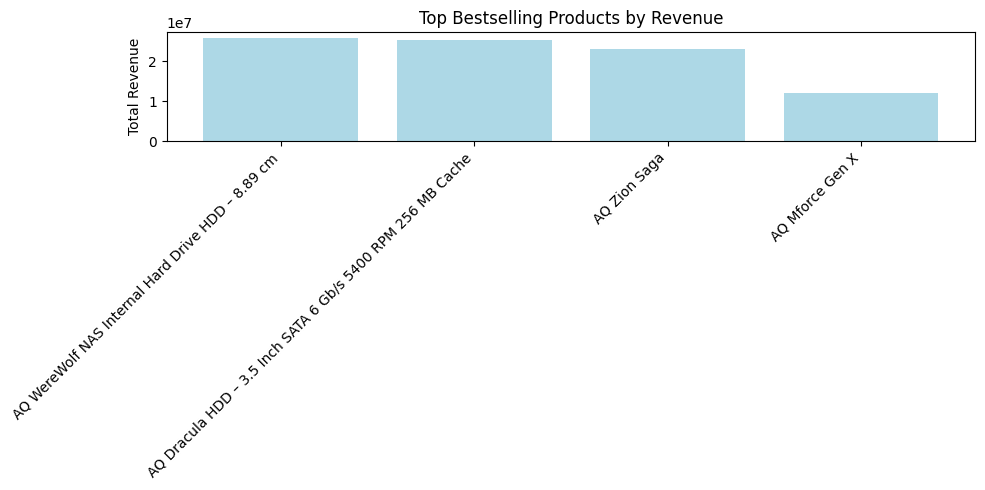

In [32]:
plt.figure(figsize=(10, 5))
plt.bar(bestsellers_by_revenue['product'], bestsellers_by_revenue['total_revenue'], color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top Bestselling Products by Revenue')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

##### Conclusion:
- #1 by revenue is "AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm"

#### Product rate by profitability

Profit per sale = (Gross Price – Manufacturing Cost) × Sold Quantity

Then, we will sum the total profit per each product.

In [33]:
bestsellers_by_profit = pd.read_sql_query('''
    SELECT dim_product.product, 
           SUM((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost) 
                * fact_sales_monthly.sold_quantity) AS total_profit
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
       AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
       AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    GROUP BY dim_product.product
    ORDER BY total_profit DESC;
''', con)
bestsellers_by_profit.round(2).style.format({'total_profit': '{:,}'})

,product,total_profit
0,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,"18,316,305.34"
1,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,"17,840,697.35"
2,AQ Zion Saga,"16,166,143.94"
3,AQ Mforce Gen X,"8,543,124.16"


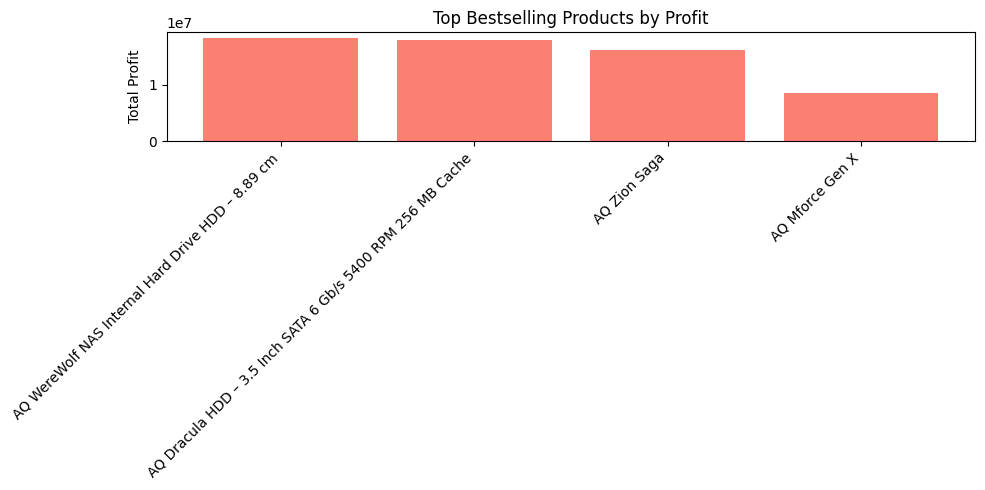

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(bestsellers_by_profit['product'], bestsellers_by_profit['total_profit'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top Bestselling Products by Profit')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

##### Conclusion:
- #1 by profit is "AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm"

### How do sales differ across regions, customer platforms and product categories?

#### Regions rate by __sales__

In [35]:
regions_by_sales = pd.read_sql_query('''
    SELECT dim_customer.region, 
       SUM(fact_sales_monthly.sold_quantity) AS total_sales
    FROM fact_sales_monthly
    JOIN dim_customer ON fact_sales_monthly.customer_code = dim_customer.customer_code
    GROUP BY dim_customer.region
    ORDER BY total_sales DESC;
    ''', con)
regions_by_sales.style.format({'total_sales': '{:,}'})

,region,total_sales
0,APAC,"2,143,395"
1,EU,"813,108"
2,NA,"806,893"
3,LATAM,"19,539"


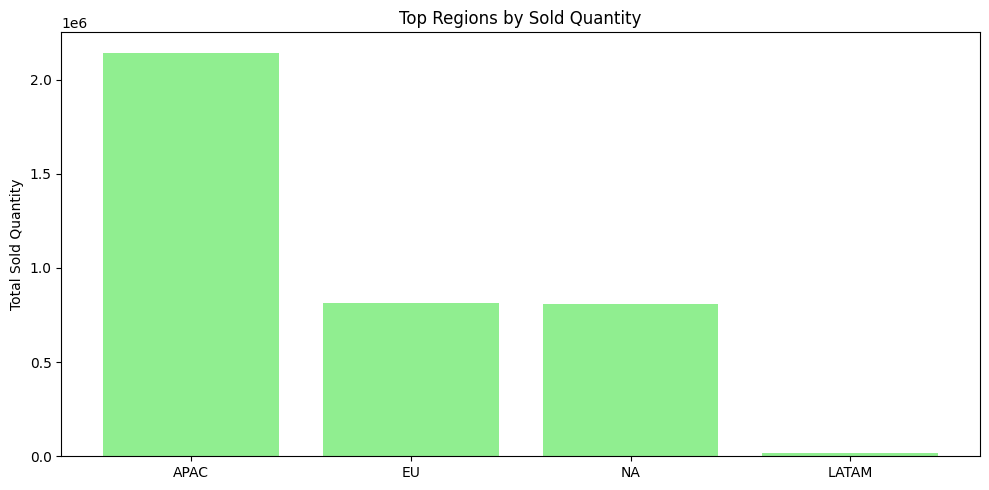

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(regions_by_sales['region'], regions_by_sales['total_sales'], color='lightgreen')
plt.title('Top Regions by Sold Quantity')
plt.ylabel('Total Sold Quantity')
plt.tight_layout()
plt.show()

#### Regions rate by __revenue__

In [37]:
regions_by_revenue = pd.read_sql_query('''
    SELECT dim_customer.region, 
           SUM(fact_sales_monthly.sold_quantity * fact_gross_price.gross_price) AS total_revenue
    FROM fact_sales_monthly
    JOIN dim_customer 
    ON fact_sales_monthly.customer_code = dim_customer.customer_code
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
    AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    GROUP BY dim_customer.region
    ORDER BY total_revenue DESC;
''', con)

regions_by_revenue.round(2).style.format({'total_revenue': '{:,}'})

,region,total_revenue
0,APAC,"48,756,126.0"
1,EU,"18,938,556.91"
2,NA,"18,434,348.76"
3,LATAM,"426,877.38"


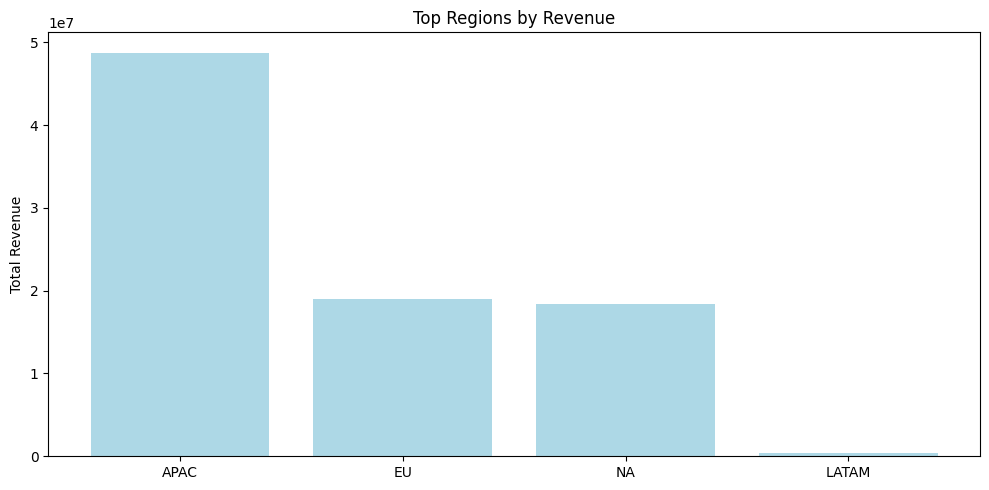

In [38]:
plt.figure(figsize=(10, 5))
plt.bar(regions_by_revenue['region'], regions_by_revenue['total_revenue'], color='lightblue')
plt.title('Top Regions by Revenue')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

#### Regions rate by __profit__

In [39]:
regions_by_profit = pd.read_sql_query('''
    SELECT dim_customer.region, 
           SUM((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost)
                * fact_sales_monthly.sold_quantity) AS total_profit
    FROM fact_sales_monthly
    JOIN dim_customer 
    ON fact_sales_monthly.customer_code = dim_customer.customer_code
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
       AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
       AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    GROUP BY dim_customer.region
    ORDER BY total_profit DESC;
''', con)

regions_by_profit.round(2).style.format({'total_profit': '{:,}'})

,region,total_profit
0,APAC,"34,286,526.65"
1,EU,"13,317,072.54"
2,NA,"12,962,602.39"
3,LATAM,"300,069.21"


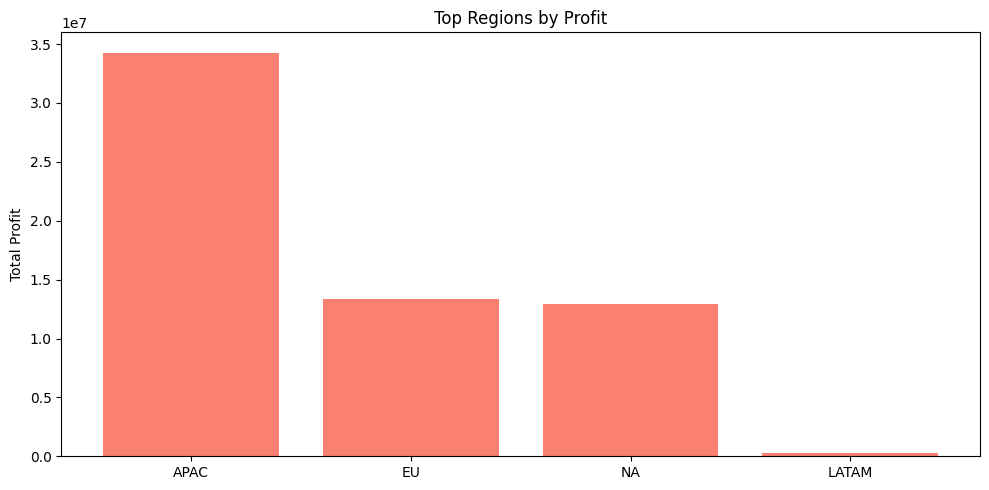

In [40]:
plt.figure(figsize=(10, 5))
plt.bar(regions_by_profit['region'], regions_by_profit['total_profit'], color='salmon')
plt.title('Top Regions by Profit')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

#### Platform rate by __sales__

In [41]:
sales_by_platform = pd.read_sql_query('''
    SELECT dim_customer.platform, 
       SUM(fact_sales_monthly.sold_quantity) AS total_sales
    FROM fact_sales_monthly
    JOIN dim_customer ON fact_sales_monthly.customer_code = dim_customer.customer_code
    GROUP BY dim_customer.platform
    ORDER BY total_sales DESC;
    ''', con)
sales_by_platform.style.format({'total_sales': '{:,}'})

,platform,total_sales
0,Brick & Mortar,"2,657,627"
1,E-Commerce,"1,125,308"


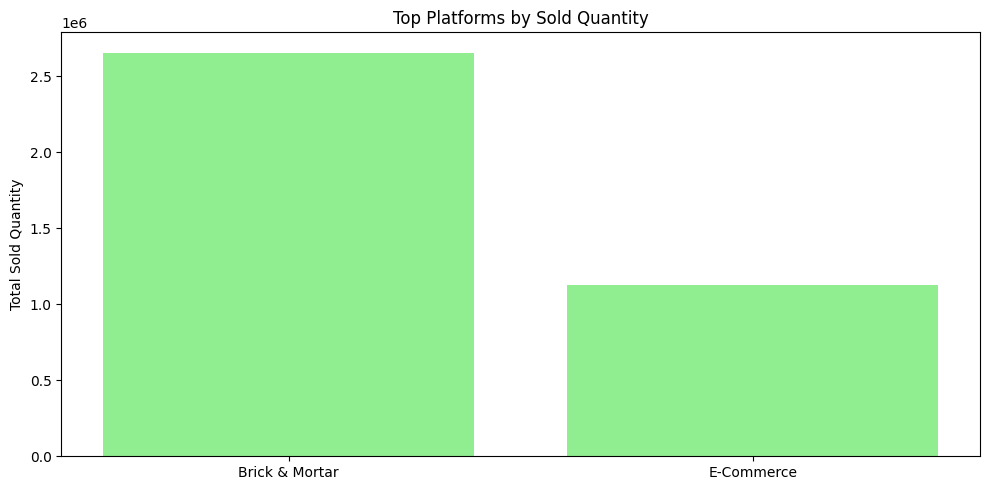

In [42]:
plt.figure(figsize=(10, 5))
plt.bar(sales_by_platform['platform'], sales_by_platform['total_sales'], color='lightgreen')
plt.title('Top Platforms by Sold Quantity')
plt.ylabel('Total Sold Quantity')
plt.tight_layout()
plt.show()

#### Platform rate by __revenue__

In [43]:
revenue_by_platform = pd.read_sql_query('''
    SELECT dim_customer.platform, 
           SUM(fact_sales_monthly.sold_quantity * fact_gross_price.gross_price) AS total_revenue
    FROM fact_sales_monthly
    JOIN dim_customer ON fact_sales_monthly.customer_code = dim_customer.customer_code
    JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code 
    AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    GROUP BY dim_customer.platform
    ORDER BY total_revenue DESC;
''', con)

revenue_by_platform.round(2).style.format({'total_revenue': '{:,}'})

,platform,total_revenue
0,Brick & Mortar,"60,962,510.64"
1,E-Commerce,"25,593,398.42"


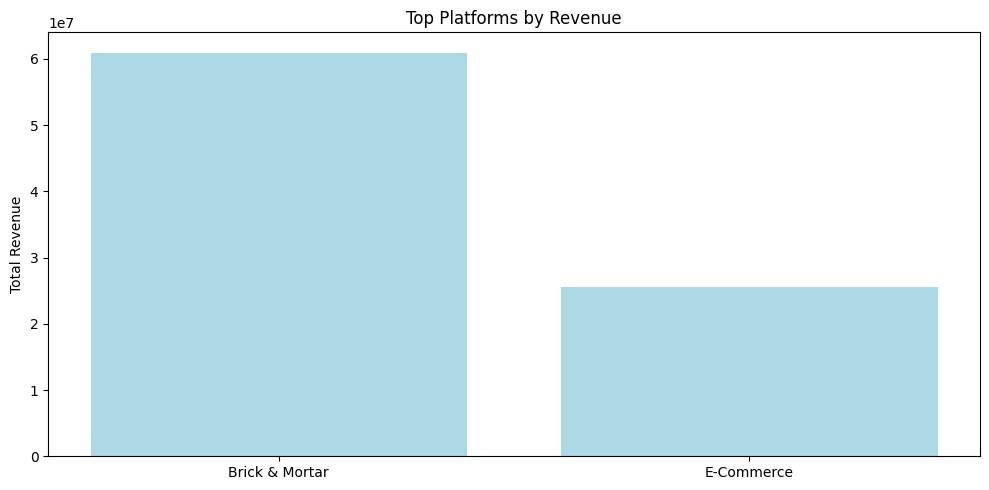

In [44]:
plt.figure(figsize=(10, 5))
plt.bar(revenue_by_platform['platform'], revenue_by_platform['total_revenue'], color='lightblue')
plt.title('Top Platforms by Revenue')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

#### Platform rate by __profit__

In [45]:
platform_by_profit = pd.read_sql_query('''
    SELECT dim_customer.platform, 
           SUM((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost)
                * fact_sales_monthly.sold_quantity) AS total_profit
    FROM fact_sales_monthly
    JOIN dim_customer 
    ON fact_sales_monthly.customer_code = dim_customer.customer_code
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
       AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
       AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    GROUP BY dim_customer.platform
    ORDER BY total_profit DESC;
''', con)

platform_by_profit.round(2).style.format({'total_profit': '{:,}'})

,platform,total_profit
0,Brick & Mortar,"42,868,297.71"
1,E-Commerce,"17,997,973.07"


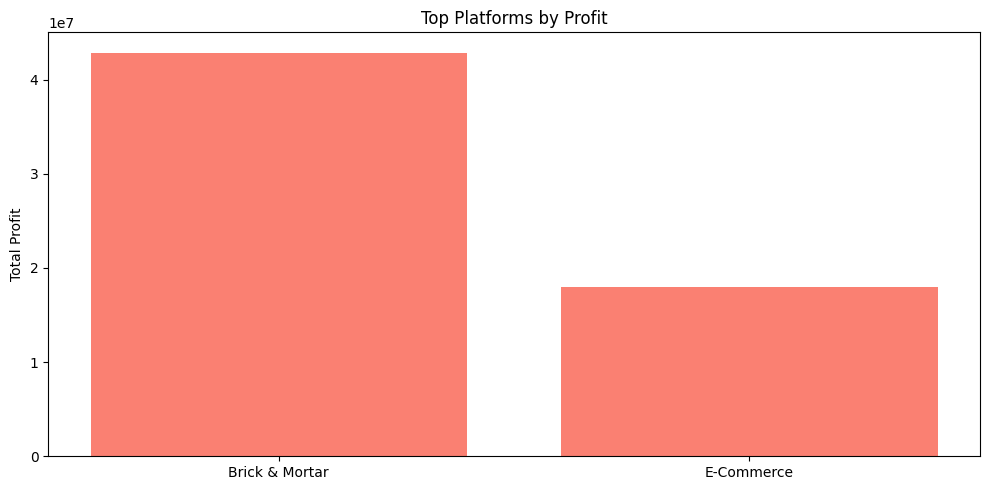

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(platform_by_profit['platform'], platform_by_profit['total_profit'], color='salmon')
plt.title('Top Platforms by Profit')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

#### Product category rate by sales

In [47]:
category_by_sales = pd.read_sql_query('''
    SELECT dim_product.category, 
           SUM(fact_sales_monthly.sold_quantity) AS total_quantity_sold
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    GROUP BY dim_product.category
    ORDER BY total_quantity_sold DESC;
''', con)

category_by_sales.round(2).style.format({'total_quantity_sold': '{:,}'})

,category,total_quantity_sold
0,Internal HDD,"3,130,399"
1,Graphic Card,"652,536"


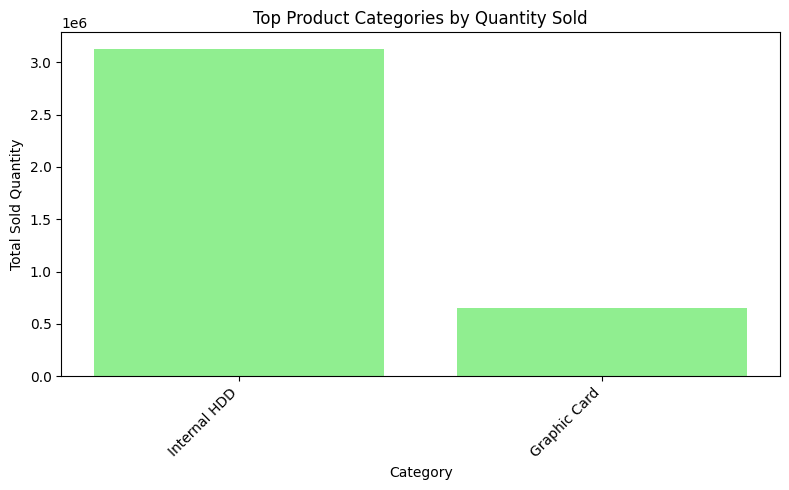

In [48]:
plt.figure(figsize=(8,5))
plt.bar(category_by_sales['category'], category_by_sales['total_quantity_sold'], color='lightgreen')
plt.title('Top Product Categories by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Total Sold Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Product category rate by revenue

In [49]:
category_by_revenue = pd.read_sql_query('''
    SELECT dim_product.category, 
           SUM(fact_sales_monthly.sold_quantity * fact_gross_price.gross_price) AS total_revenue
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
    AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    GROUP BY dim_product.category
    ORDER BY total_revenue DESC;
''', con)

category_by_revenue.round(2).style.format({'total_revenue': '{:,}'})

,category,total_revenue
0,Internal HDD,"74,456,333.75"
1,Graphic Card,"12,099,575.31"


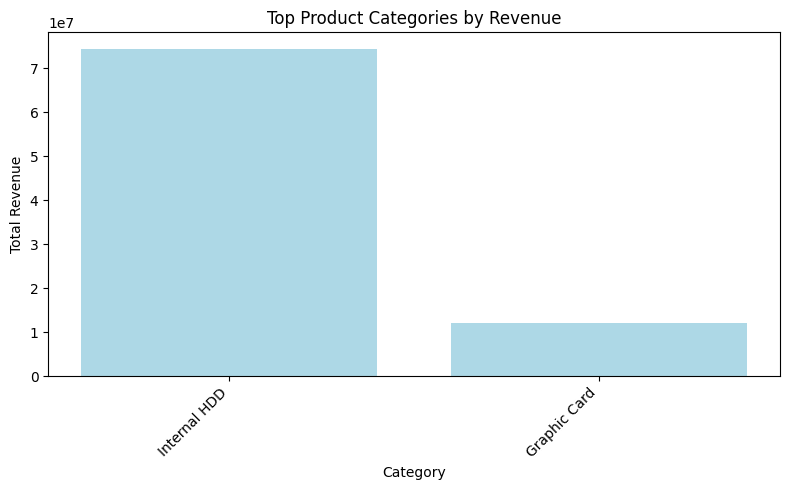

In [50]:
plt.figure(figsize=(8,5))
plt.bar(category_by_revenue['category'], category_by_revenue['total_revenue'], color='lightblue')
plt.title('Top Product Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Product category rate by profit

In [51]:
category_by_profit = pd.read_sql_query('''
    SELECT dim_product.category, 
           SUM((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost)
                * fact_sales_monthly.sold_quantity) AS total_profit
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
       AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
       AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    GROUP BY dim_product.category
    ORDER BY total_profit DESC;
''', con)

# Display results
category_by_profit.round(2).style.format({'total_profit': '{:,}'})

,category,total_profit
0,Internal HDD,"52,323,146.63"
1,Graphic Card,"8,543,124.16"


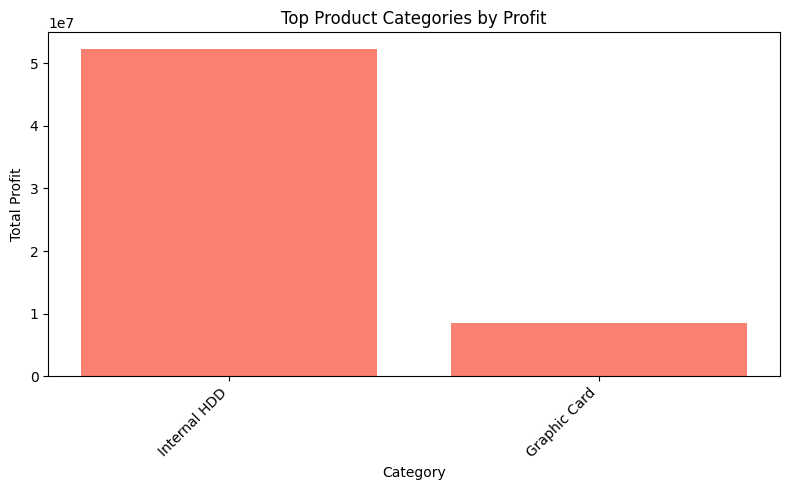

In [52]:
plt.figure(figsize=(8,5))
plt.bar(category_by_profit['category'], category_by_profit['total_profit'], color='salmon')
plt.title('Top Product Categories by Profit')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Conclusion:
- Top region by sales, revenue and profit: APAC
- Top platform by sales, revenue and profit: Brick & Mortar
- Top product category by sales, revenue and profit:Internal HDD

### How has product popularity changed over time?

In [53]:
product_trends = pd.read_sql_query('''
    SELECT dim_product.product,
           SUBSTR(fact_sales_monthly.date, 1, 7) AS year_month,
           SUM(fact_sales_monthly.sold_quantity) AS total_quantity_sold
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    GROUP BY dim_product.product, year_month
    ORDER BY dim_product.product, year_month;
''', con)

product_trends.head()

,product,year_month,total_quantity_sold
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-09,5237
1,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-10,6472
2,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-11,9642
3,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-12,9572
4,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2018-01,5223


In [54]:
product_trends_unique = product_trends['product'].unique()
product_trends_unique

array(['AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache',
       'AQ Mforce Gen X',
       'AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm',
       'AQ Zion Saga'], dtype=object)

In [55]:
top_products = (product_trends.groupby('product')['total_quantity_sold']
                .sum()
                .sort_values(ascending=False)
                .head(5)
                .index.tolist())

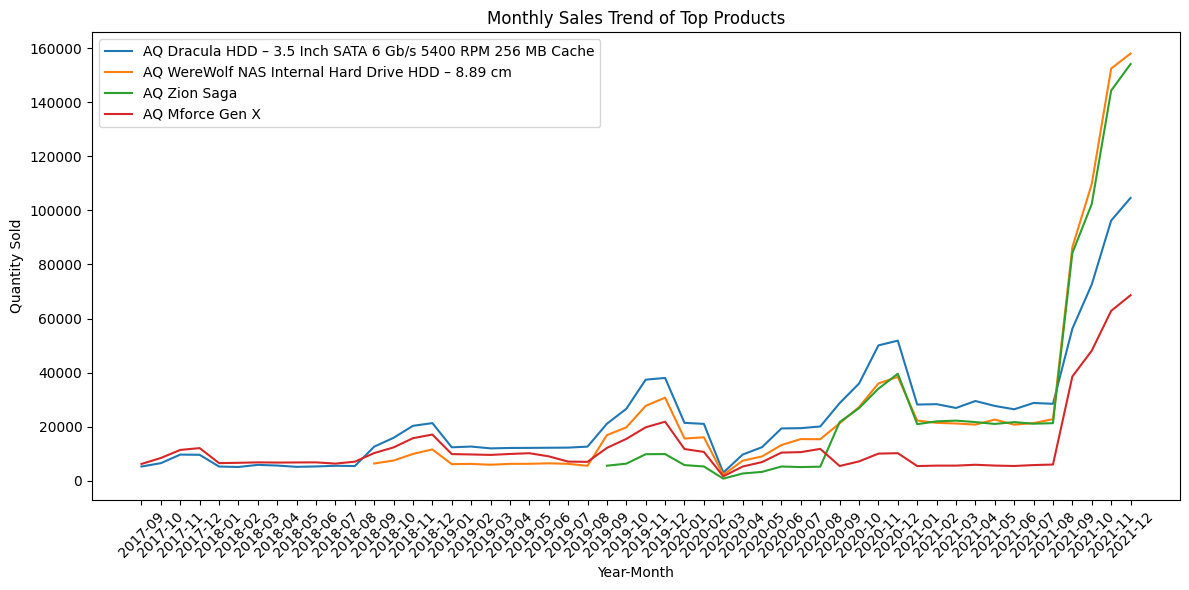

In [56]:
plt.figure(figsize=(12, 6))

for product in top_products:
    product_data = product_trends[product_trends['product'] == product]
    plt.plot(product_data['year_month'], product_data['total_quantity_sold'], label=product)

plt.xticks(rotation=45)
plt.title('Monthly Sales Trend of Top Products')
plt.xlabel('Year-Month')
plt.ylabel('Quantity Sold')
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
seasonal_trends = pd.read_sql_query('''
    SELECT dim_product.product,
           STRFTIME('%m', fact_sales_monthly.date) AS month,
           SUM(fact_sales_monthly.sold_quantity) AS total_quantity_sold
    FROM fact_sales_monthly
    JOIN dim_product 
    ON fact_sales_monthly.product_code = dim_product.product_code
    GROUP BY dim_product.product, month
    ORDER BY dim_product.product, month;
''', con)

seasonal_trends.head().style.format({'total_quantity_sold': '{:,}'})

,product,month,total_quantity_sold
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,01,"67,113"
1,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,02,"66,989"
2,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,03,"47,658"
3,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,04,"56,809"
4,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,05,"57,286"


In [58]:
top_products = (seasonal_trends.groupby('product')['total_quantity_sold']
                .sum()
                .sort_values(ascending=False)
                .head(5)
                .index.tolist())

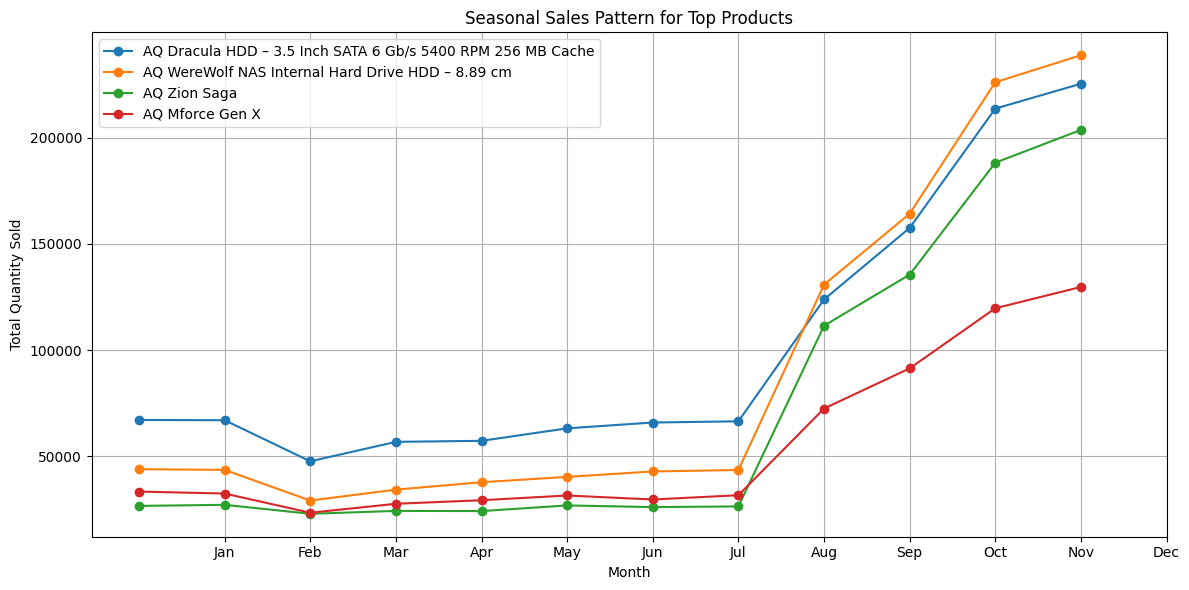

In [59]:
plt.figure(figsize=(12, 6))

for product in top_products:
    monthly_data = seasonal_trends[seasonal_trends['product'] == product]
    plt.plot(monthly_data['month'], monthly_data['total_quantity_sold'], marker='o', label=product)

plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Seasonal Sales Pattern for Top Products')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusion:
- we see seasonal trends wih rise of sales starting in August of each year and dropping by end of the year.

### how discounts and pricing affect product sales

In [60]:
avg_prices = pd.read_sql_query('''
    SELECT dim_product.product, 
           AVG(fact_gross_price.gross_price) AS average_price
    FROM fact_gross_price
    JOIN dim_product 
    ON fact_gross_price.product_code = dim_product.product_code
    GROUP BY dim_product.product
    ORDER BY average_price DESC;
''', con)

avg_prices.round(2).head()

,product,average_price
0,AQ HOME Allin1 Gen 2,833.09
1,AQ BZ Allin1 Gen 2,806.08
2,AQ Home Allin1,748.12
3,AQ BZ Allin1,727.16
4,AQ Smash 2,683.16


In [61]:
discount_impact = pd.read_sql_query('''
    SELECT fact_pre_discount.pre_invoice_discount_pct, 
           AVG(fact_sales_monthly.sold_quantity) AS avg_sales
    FROM fact_sales_monthly
    JOIN fact_pre_discount 
    ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code 
    AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
    GROUP BY fact_pre_discount.pre_invoice_discount_pct
    ORDER BY fact_pre_discount.pre_invoice_discount_pct;
''', con)

discount_impact.head()

,pre_invoice_discount_pct,avg_sales
0,0.0510,201.444444
1,0.0521,10.083333
2,0.0525,13.752809
3,0.0531,33.696970
4,0.0534,43.988764


### Impact of Discounts on Sales

In [62]:
discount_impact = pd.read_sql_query('''
    SELECT fact_pre_discount.pre_invoice_discount_pct, 
           fact_sales_monthly.sold_quantity
    FROM fact_sales_monthly
    JOIN fact_pre_discount 
    ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code 
        AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
    ORDER BY fact_pre_discount.pre_invoice_discount_pct;
''', con)

# Calculate medians
median_sales = discount_impact.groupby('pre_invoice_discount_pct')['sold_quantity'].median().reset_index()
median_sales.columns = ['pre_invoice_discount_pct', 'median_sales']

median_sales.head(10)

,pre_invoice_discount_pct,median_sales
0,0.0510,189.0
1,0.0521,10.0
2,0.0525,14.0
3,0.0531,27.0
4,0.0534,42.0
5,0.0536,17.5
6,0.0546,28.0
7,0.0548,18.0
8,0.0549,2.0
9,0.0552,25.0


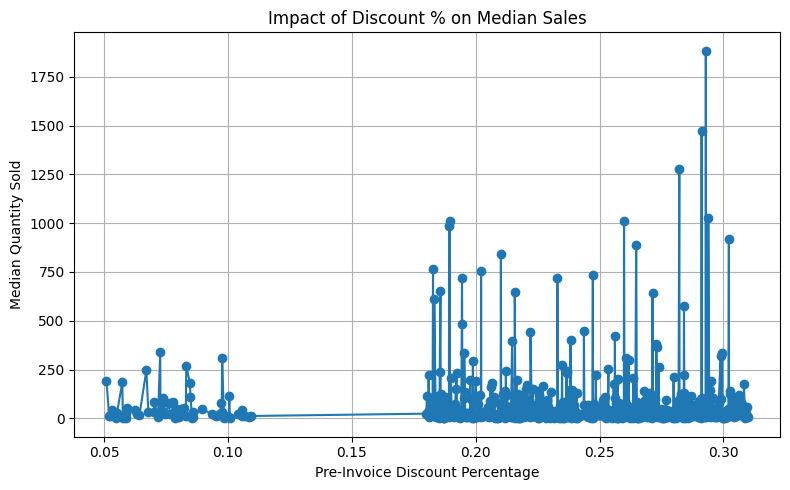

In [63]:
plt.figure(figsize=(8,5))
plt.plot(median_sales['pre_invoice_discount_pct'], median_sales['median_sales'], marker='o')
plt.title('Impact of Discount % on Median Sales')
plt.xlabel('Pre-Invoice Discount Percentage')
plt.ylabel('Median Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusion:
- low discounts below ~17% show little and inconsistent impact on sales medians
- higher discounts cause some increase of sales medians, but still this effect is inconsistent with visible spikes

### How do discounts affect product sales?

Let's find monthly sales volume by discount percentage

In [64]:
discount_time_sales = pd.read_sql_query('''
    SELECT fact_pre_discount.pre_invoice_discount_pct, 
           SUBSTR(fact_sales_monthly.date, 1, 7) AS year_month,
           SUM(fact_sales_monthly.sold_quantity) AS total_quantity_sold
    FROM fact_sales_monthly
    JOIN fact_pre_discount 
    ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code 
    AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
    GROUP BY fact_pre_discount.pre_invoice_discount_pct, year_month
    ORDER BY year_month, fact_pre_discount.pre_invoice_discount_pct;
''', con)

discount_time_sales.head()

,pre_invoice_discount_pct,year_month,total_quantity_sold
0,0.0521,2017-09,86
1,0.0536,2017-09,138
2,0.0587,2017-09,14
3,0.0700,2017-09,175
4,0.0824,2017-09,350


In [65]:
discount_time_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pre_invoice_discount_pct  6372 non-null   float64
 1   year_month                6372 non-null   object 
 2   total_quantity_sold       6372 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 149.5+ KB


There are too many discount levels. Let's group discounts by 4 basic levels:
- low
- medium
- high
- very high

Lets define the bins for discount levels

In [66]:
fact_pre_discount['pre_invoice_discount_pct'].describe()

count    1045.000000
mean        0.233807
std         0.058077
min         0.051000
25%         0.204800
50%         0.243900
75%         0.276700
max         0.309900
Name: pre_invoice_discount_pct, dtype: float64

Summary of discount statistics:
- Min: 5.1%
- 25th percentile: 20.5%
- Median: 24.4%
- 75th percentile: 27.7%
- Max: 31%

Most discounts fall between 20–31%.

Suggested levels:
- Low: 0%–20%
- Medium: 20%–25%
- High: 25%–28%
- Very High: 28%+

In [67]:
# apply suggested levels
discount_time_sales['discount_group'] = pd.cut(
    discount_time_sales['pre_invoice_discount_pct'],
    bins=[0, 0.20, 0.25, 0.28, 0.31],
    labels=['Low (0-20%)', 'Medium (20-25%)', 'High (25-28%)', 'Very High (28-31%)']
)

In [68]:
grouped_discount_sales = discount_time_sales.groupby(['discount_group', 'year_month']).agg(
    total_quantity_sold=('total_quantity_sold', 'sum')
).reset_index()

C:\Users\pdudo\AppData\Local\Temp\ipykernel_41436\1010471748.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_discount_sales = discount_time_sales.groupby(['discount_group', 'year_month']).agg(


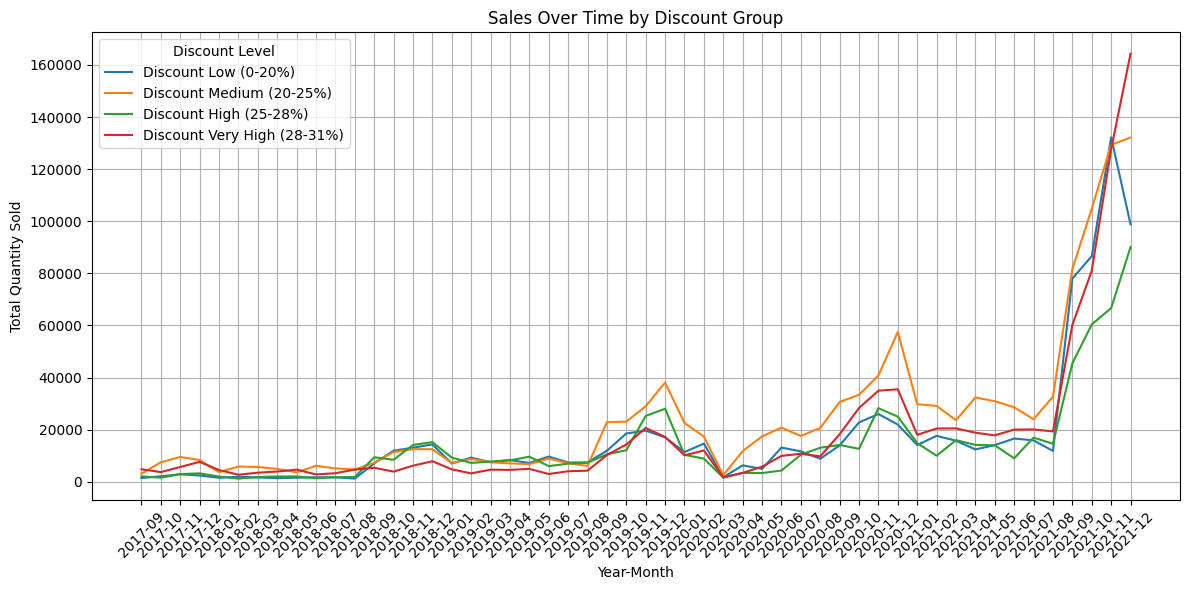

In [69]:
plt.figure(figsize=(12, 6))

for group in grouped_discount_sales['discount_group'].unique():
    data = grouped_discount_sales[grouped_discount_sales['discount_group'] == group]
    plt.plot(data['year_month'], data['total_quantity_sold'], label=f'Discount {group}')

plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Over Time by Discount Group')
plt.legend(title='Discount Level')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusion:
- __medium__ level discount give the most effect to sales boost

Let's check the correlation btw discount and quantity sold

In [70]:
# check correlation btw discount % and quantity sold month-by-month.
discount_correlations = discount_time_sales.groupby('year_month').apply(
    lambda x: x[['pre_invoice_discount_pct', 'total_quantity_sold']].corr().iloc[0, 1]
).reset_index(name='correlation')

discount_correlations.head()

C:\Users\pdudo\AppData\Local\Temp\ipykernel_41436\3270865834.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  discount_correlations = discount_time_sales.groupby('year_month').apply(


,year_month,correlation
0,2017-09,0.190282
1,2017-10,0.037987
2,2017-11,0.052153
3,2017-12,0.053277
4,2018-01,0.166964


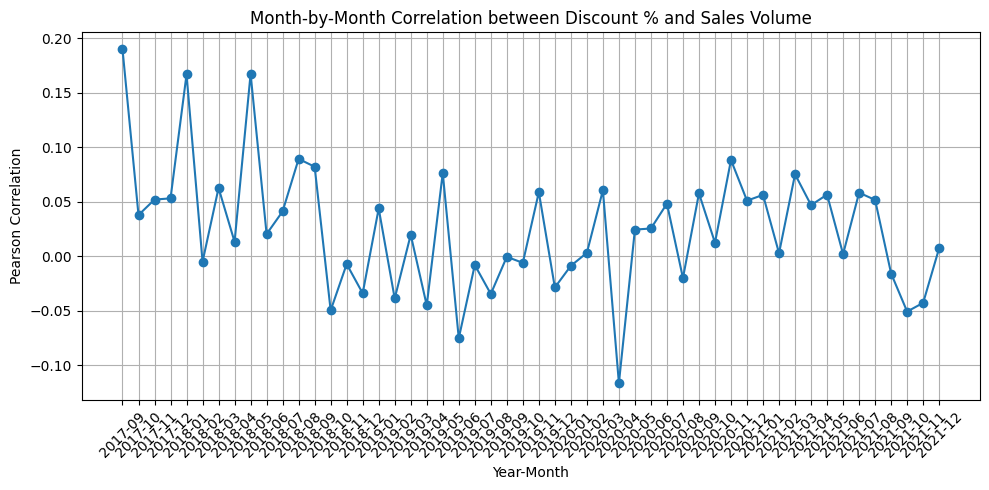

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(discount_correlations['year_month'], discount_correlations['correlation'], marker='o')
plt.xticks(rotation=45)
plt.title('Month-by-Month Correlation between Discount % and Sales Volume')
plt.xlabel('Year-Month')
plt.ylabel('Pearson Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
# Count how many months had positive and negative correlation values
positive_count = (discount_correlations['correlation'] > 0).sum()
negative_count = (discount_correlations['correlation'] < 0).sum()

# Display results
print(f"Months with positive correlation: {positive_count}")
print(f"Months with negative correlation: {negative_count}")

Months with positive correlation: 34
Months with negative correlation: 18


##### Conclusion: __discounts have slightly positive correlation on sales__
- 34 out 52 months (about 65%) have positive correlation
- max correlation below 0.20 shows that the correlation is not strong or/and consistent

To do this we have to:

- Claculate total sales per month
- Identify months with an increasing sales trend (compared to the previous month)
- Find what the discount/sales correlation was in those months
- Summarize whether it tends to be higher, lower, or no pattern

In [73]:
# Total quantity sold per month
monthly_sales_trend = discount_time_sales.groupby('year_month')['total_quantity_sold'].sum().reset_index()

# Calculate sales difference from previous month
monthly_sales_trend['sales_diff'] = monthly_sales_trend['total_quantity_sold'].diff()

# Mark months with an increasing sales trend
monthly_sales_trend['increasing_trend'] = monthly_sales_trend['sales_diff'] > 0

monthly_sales_trend.head(10).style.format({'total_quantity_sold': '{:,}', 'sales_diff': '{:,.0f}'})

,year_month,total_quantity_sold,sales_diff,increasing_trend
0,2017-09,"11,425",nan,False
1,2017-10,"14,860","3,435",True
2,2017-11,"21,012","6,152",True
3,2017-12,"21,615",603,True
4,2018-01,"11,713","-9,902",False
5,2018-02,"11,657",-56,False
6,2018-03,"12,603",946,True
7,2018-04,"12,282",-321,False
8,2018-05,"11,847",-435,False
9,2018-06,"12,018",171,True


In [74]:
# Merge the trend info with correlations
correlation_trend_analysis = pd.merge(discount_correlations, monthly_sales_trend[['year_month', 'increasing_trend']], on='year_month')

correlation_trend_analysis.head()

,year_month,correlation,increasing_trend
0,2017-09,0.190282,False
1,2017-10,0.037987,True
2,2017-11,0.052153,True
3,2017-12,0.053277,True
4,2018-01,0.166964,False


In [75]:
# Average correlation in increasing months
increasing_corr_avg = correlation_trend_analysis[correlation_trend_analysis['increasing_trend'] == True]['correlation'].mean()

# Average correlation in non-increasing months
non_increasing_corr_avg = correlation_trend_analysis[correlation_trend_analysis['increasing_trend'] == False]['correlation'].mean()

print(f"Average correlation during increasing sales months: {increasing_corr_avg:.3f}")
print(f"Average correlation during non-increasing sales months: {non_increasing_corr_avg:.3f}")

Average correlation during increasing sales months: 0.016
Average correlation during non-increasing sales months: 0.043


##### Conclusion:
- the average correlation of increasing sales months is much lower than the one of non-increasing months, which means that __discounts have little to no effect__

### Overall profitability and marginality of the company

In [76]:
overall_profitability = pd.read_sql_query('''
    SELECT 
        SUM(fact_gross_price.gross_price * fact_sales_monthly.sold_quantity) AS total_revenue,
        SUM(fact_manufacturing_cost.manufacturing_cost * fact_sales_monthly.sold_quantity) AS total_cost,
        SUM((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost)
            * fact_sales_monthly.sold_quantity) AS total_profit
    FROM fact_sales_monthly
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
        AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
        AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year;
''', con)

print("Company Overall Profitability:")
overall_profitability.style.format('{:,.0f}')

Company Overall Profitability:


,total_revenue,total_cost,total_profit
0,"86,555,909","25,689,638","60,866,271"


In [77]:
overall_profitability_discounted = pd.read_sql_query('''
    SELECT 
        SUM(fact_gross_price.gross_price * (1 - fact_pre_discount.pre_invoice_discount_pct) 
            * fact_sales_monthly.sold_quantity) AS total_revenue,

        SUM(fact_manufacturing_cost.manufacturing_cost * fact_sales_monthly.sold_quantity) AS total_cost,

        SUM((fact_gross_price.gross_price * (1 - fact_pre_discount.pre_invoice_discount_pct) 
             - fact_manufacturing_cost.manufacturing_cost) * fact_sales_monthly.sold_quantity) AS total_profit

    FROM fact_sales_monthly
    JOIN fact_gross_price 
        ON fact_sales_monthly.product_code = fact_gross_price.product_code 
        AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
        ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
        AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    JOIN fact_pre_discount
        ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code 
        AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year;
''', con)

print("Company Overall Profitability (After Discounts):")
overall_profitability_discounted.style.format('{:,.0f}')


Company Overall Profitability (After Discounts):


,total_revenue,total_cost,total_profit
0,"66,312,380","25,689,638","40,622,742"


In [78]:
marginality_summary = pd.read_sql_query('''
    SELECT 
        AVG((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost)
            / fact_gross_price.gross_price) * 100 AS average_profit_margin_pct
    FROM fact_sales_monthly
    JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
        AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
        AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year;
''', con)

print("Average Profit Margin Percentage:")
marginality_summary.round(2)

Average Profit Margin Percentage:


,average_profit_margin_pct
0,70.23


In [79]:
marginality_discounted = pd.read_sql_query('''
    SELECT 
        AVG( 
            (fact_gross_price.gross_price * (1 - fact_pre_discount.pre_invoice_discount_pct) 
            - fact_manufacturing_cost.manufacturing_cost)
            / (fact_gross_price.gross_price * (1 - fact_pre_discount.pre_invoice_discount_pct))
        ) * 100 AS average_profit_margin_pct

    FROM fact_sales_monthly
    JOIN fact_gross_price 
        ON fact_sales_monthly.product_code = fact_gross_price.product_code 
        AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    JOIN fact_manufacturing_cost 
        ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code 
        AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    JOIN fact_pre_discount
        ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code 
        AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year;
''', con)

print("Average Profit Margin (After Discounts %):")
marginality_discounted.style.format('{:,.2f}')


Average Profit Margin (After Discounts %):


,average_profit_margin_pct
0,61.00


##### Conclusion:
- Since marginality over 30% is considered as good for hardware business, AtliQ's __61%__ (after discounts) shows it is a solid and stable business. 

## Hypothesis testing

### Prioritize hypotheses

Let's prioritize the following hypotheses by RICE framework (Reach, Impact, Confidence, Effort)

RICE = (Reach x Impact x Confidence)/Effort

Let's score each parameter for each hypotheses

Reach, Impact, Confidence, Effort
- Product sales vary significantly across different regions and platforms	5,	5,	5,	2
    - reasoning: high reach, strong strategic value, strong confidence
- Certain product categories always sell better than others across markets	4,	4,	4,	2
    - important for category management and local planning
- Discounts give short-term sales boost	5,	3,	3,	2
    - interesting to know, but has average impact and confidence according to the calculations above
- A small number of products contribute to majority of sales	4,	5,	5,	2
    - Pareto principle

In [80]:
# display full names of hypotheses
pd.set_option('display.max_colwidth', None)

data = {
    'Hypothesis': [
        'Product sales vary significantly across different regions and platforms',
        'Certain product categories always sell better than others across markets',
        'Discounts give short-term sales boost',
        'A small number of products contribute to majority of sales'        
    ],
    'Reach': [5, 4, 5, 4],
    'Impact': [5, 4, 3, 5],
    'Confidence': [5, 4, 3, 5],
    'Effort': [2, 2, 2, 2]
}

rice_df = pd.DataFrame(data)
rice_df['RICE_Score'] = (rice_df['Reach'] * rice_df['Impact'] * rice_df['Confidence']) / rice_df['Effort']
rice_df = rice_df.sort_values(by='RICE_Score', ascending=False).reset_index(drop=True)

rice_df

,Hypothesis,Reach,Impact,Confidence,Effort,RICE_Score
0,Product sales vary significantly across different regions and platforms,5,5,5,2,62.5
1,A small number of products contribute to majority of sales,4,5,5,2,50.0
2,Certain product categories always sell better than others across markets,4,4,4,2,32.0
3,Discounts give short-term sales boost,5,3,3,2,22.5


### Hypotheses testing

#### Hypothesis #1 Product sales vary significantly across different regions and platforms

In [81]:
sales_data = pd.read_sql_query('''
    SELECT fact_sales_monthly.sold_quantity, dim_customer.region, dim_customer.platform
    FROM fact_sales_monthly
    JOIN dim_customer 
    ON fact_sales_monthly.customer_code = dim_customer.customer_code
    WHERE fact_sales_monthly.sold_quantity IS NOT NULL;
''', con)

sales_data.head()

,sold_quantity,region,platform
0,51,APAC,Brick & Mortar
1,77,APAC,E-Commerce
2,17,APAC,Brick & Mortar
3,6,APAC,E-Commerce
4,5,APAC,Brick & Mortar


In [82]:
sales_data['platform'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [83]:
platform_1_sales = sales_data[sales_data['platform'] == 'Brick & Mortar']['sold_quantity']
platform_2_sales = sales_data[sales_data['platform'] == 'E-Commerce']['sold_quantity']

In [84]:
print("Statistical significance: {0:.50f}".format(stats.mannwhitneyu(platform_1_sales, platform_2_sales)[1]))
print("Relative difference: {0:.3f}".format(platform_2_sales.mean()/platform_1_sales.mean()-1))

Statistical significance: 0.00000000000000000000000000000000000000019226371503
Relative difference: 0.054


##### Conclusion:
- p_value below 0.05 and relative difference 0.054 prove that Brick & Mortar platform has significantly more sales comparing to E-commerce.
- this aligns with the rate of platform in the section 2.3.4

#### Hypothesis #2 A small number of products contribute to majority of sales

##### Conclusion:
Since we have sales data of 4 products only, this hypothesis is confirmed. 

#### Hypothesis #3

##### Conclusion:
- According to the section 2.7 Internal HDD category has more sales

#### Hypothesis #4 Discounts give short-term sales boost

Identify the months with discounts above medium level (0ver 20% accoring to the section 2.8)

In [85]:
discount_months = discount_time_sales[discount_time_sales['pre_invoice_discount_pct'] >= 0.20]['year_month'].unique()
discount_months

array(['2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
       '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12'], dtype=object)

Get sales data in these months and in the following months:

In [86]:
discount_sales = discount_time_sales[discount_time_sales['year_month'].isin(discount_months)]['total_quantity_sold']

# Create a list of post-discount months
import pandas as pd

post_discount_months = pd.to_datetime(discount_months) + pd.DateOffset(months=1)
post_discount_months = post_discount_months.strftime('%Y-%m')

post_discount_sales = discount_time_sales[discount_time_sales['year_month'].isin(post_discount_months)]['total_quantity_sold']

Check the size of the samples:

In [87]:
print(len(discount_sales), len(post_discount_sales))

6372 6290


In [88]:
print("Statistical significance: {0:.3f}".format(stats.mannwhitneyu(discount_sales, post_discount_sales)[1]))
print("Relative difference: {0:.3f}".format(post_discount_sales.mean()/discount_sales.mean()-1))

Statistical significance: 0.561
Relative difference: 0.010


##### Conclusion:
- with p-values above 0.561 (above 0.05) we fail to reject the null hypothesis
- there is not statistically significant difference btw sales during discount months and immediately afer

## Overall conclusion

### Work done:

__Data Connection & Exploration__

- Connected to the atliq_db.sqlite3 database.
- Inspected available tables: dim_customer, dim_product, fact_sales_monthly, etc.

__Data Cleaning__
- Checked for missing values and duplicates.
- Found and removed 1 missing record in customer data.
- Confirmed no duplicate records.

__Bestselling Products Analysis__
- Calculated total sales quantity and revenue per product.
- Found that sales data exists for only 4 products.
- Identified top products by quantity and revenue.

__Regional, Platform, and Category Sales Comparison__
- Grouped sales data by region, platform, and category.
- Compared total sales quantity, revenue, and prifit.
- Highlighted the dominance of APAC (region), Brick & Mortar (platform), and internal HDD (product category).

__Trend Analysis Over Time__
- Analyzed monthly sales data over time.
- Detected consistent seasonal sales peaks starting in August.

__Discount Impact Analysis__
- Calculated discount levels and grouped them into four categories: Low, Medium, High, Very High.
- Evaluated the effect of discount levels on sales quantities.
- Assessed correlation between discount percentage and sales — found weak, inconsistent relationship.

__Overall profitablity and marginality analysis__:
- calculated total profit of the company: __60,866,271__
- identified overall marginality: __~70%__, which proves stable and solid business

__Hypothesis Testing__
- Prioritized 4 business hypotheses using the RICE framework.
- Conducted statistical tests:
    - Sales distribution checks to confirm sales concentration in a few products.
    - Discount months vs following months sales comparison — no significant difference detected.
    - Validated category performance via prior category contribution analysis.

### Conclusion

__This sales analysis project revealed several valuable insights for AtliQ Hardware’s strategy:__

- Sales are highly concentrated in a limited product range, with __AQ Dracula HDD__ and __AQ WereWolf NAS__ driving most sales.
- Regional and platform-based differences are significant, with __APAC__ and __Brick & Mortar__ leading by large margins.
- Seasonal trends are consistent, indicating the importance of __Q4__ planning.
- Discounts do not strongly correlate with higher sales, though moderate discounts have a some short-term effect.
- Product categories like __Internal HDDs__ perform better overall, suggesting potential for focused marketing or stock management.
- in general the company is profitable with high marginality of abo __61%__
- Hypothesis testing validated key assumptions about sales distribution and product performance.

__Recommendation:__

AtliQ should expand data collection across more products and refine discount strategies. Targeted campaigns for Q4 and a focus on expanding successful categories could further optimize sales performance.